Der Staatliche Pensionsfonds des Königreichs Norwegen (...) zählt (...) zu den zwei mit Abstand größten Staatsfonds der Welt. Mit dem Fonds sollen die staatlichen Öleinnahmen investiert werden, um für die Zeit vorzusorgen, in der die Erdölreserven der Nordsee zur Neige gehen. [Wikipedia]

### Teilaufgabe 1
Laden Sie die letzten fünf jährlichen Berichte (Investment Type: Equity) zur Fonds-Zusammensetzung im .xlsx-Format von der [Webseite des Pensionsfonds](https://www.nbim.no/en/investments/all-investments/#/) herunter und visualisieren Sie die zeitliche Entwicklung des Gesamtwerts der vom Fond gehaltenen Aktien je Industriesegment.


In [107]:
import pandas as pd

df_2020 = pd.read_excel("./datasets/EQ_2020_Country.xlsx")
df_2021 = pd.read_excel("./datasets/EQ_2021_Country.xlsx")
df_2022 = pd.read_excel("./datasets/EQ_2022_Country.xlsx")
df_2023 = pd.read_excel("./datasets/EQ_2023_Country.xlsx")
df_2024 = pd.read_excel("./datasets/EQ_2024_Country.xlsx")

df_2020["Year"] = 2020
df_2021["Year"] = 2021
df_2022["Year"] = 2022
df_2023["Year"] = 2023
df_2024["Year"] = 2024

df = pd.concat([df_2020, df_2021, df_2022, df_2023, df_2024], ignore_index=True)
df

,Region,Country,Name,Industry,Market Value(NOK),Market Value(USD),Voting,Ownership,Incorporation Country,Year
0,Oceania,Australia,A2B Australia Ltd,Industrials,5915559,690913,0.62,0.62,Australia,2020
1,Oceania,Australia,Abacus Property Group,Financials,124170407,14502585,0.81,0.81,Australia,2020
2,Oceania,Australia,Accent Group Ltd,Consumer Services,88333196,10316948,1.07,1.07,Australia,2020
3,Oceania,Australia,Adairs Ltd,Consumer Goods,63937438,7467626,1.73,1.73,Australia,2020
4,Oceania,Australia,Adbri Ltd,Industrials,108161795,12632846,0.75,0.75,Australia,2020
...,...,...,...,...,...,...,...,...,...,...
45202,Asia,Vietnam,Vietnam Technological & Commercial Joint Stock...,Financials,438963360,38650157,0.57,0.57,Vietnam,2024
45203,Asia,Vietnam,Viglacera Corp JSC,Industrials,37960578,3342380,0.42,0.42,Vietnam,2024
45204,Asia,Vietnam,Vincom Retail JSC,Consumer Discretionary,13290999,1170255,0.08,0.08,Vietnam,2024
45205,Asia,Vietnam,Vinh Hoan Corp,Consumer Staples,34151719,3007015,0.48,0.48,Vietnam,2024


In [108]:
grouped = df.groupby(["Year", "Industry"])
df_industryValPerYear = grouped["Market Value(USD)"].sum().reset_index()

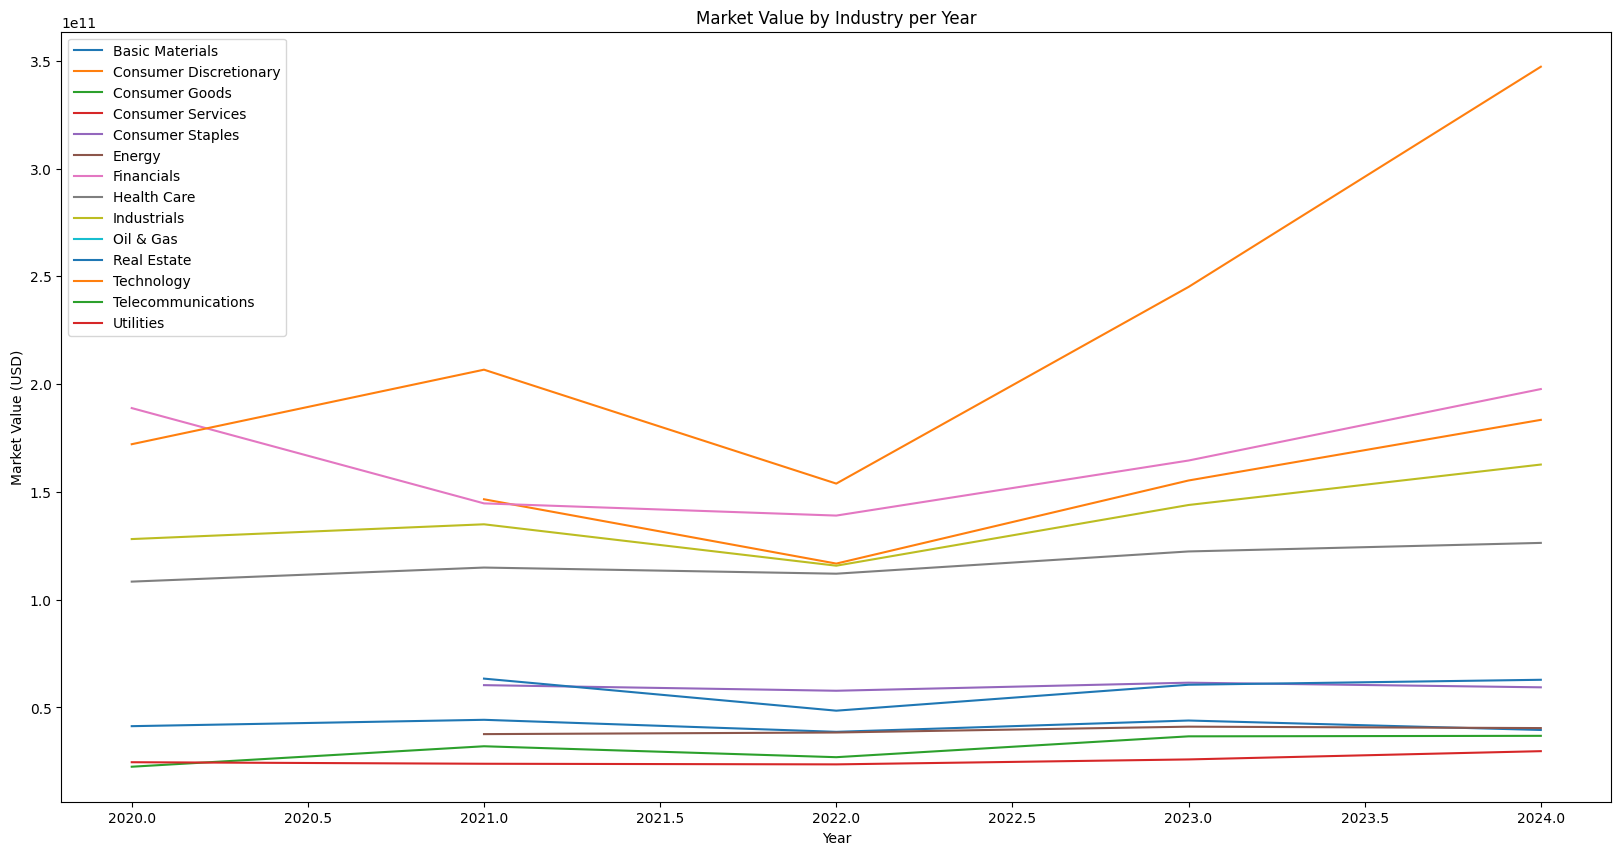

In [ ]:
from matplotlib import pyplot as plt


fig, ax = plt.subplots(figsize=(20,10))

for label, df_healthCareFirm in df_industryValPerYear.groupby('Industry'):
	df_healthCareFirm.plot(x="Year", y="Market Value(USD)", ax=ax, label=label)
ax.set_title("Market Value by Industry per Year")
ax.set_xlabel("Year")
ax.set_ylabel("Market Value (USD)")
plt.legend()

### Teilaufgabe 2
Betrachten Sie nun das Industriesegment "Health Care".
Visualisieren Sie die zeitliche Entwicklung des Marktwerts der vom Fonds gehaltenen Anteile der drei Firmen, die im aktuellsten Bericht den größten Marktwert haben.
Ein Privatanleger unterstellt dem Management des Fonds nun eine überlegene Marktkenntnis und möchte eine gute Investment-Entscheidung (im Health Care-Bereich) fällen basierend auf den historischen Entscheidungen des Fonds. Empfehlen Sie dem Privatanleger eine Aktie basierend auf den vorliegenden Daten.

In [ ]:
df_healthCareFirm = df[df["Industry"] == "Health Care"]
df_healthCareFirm

,Region,Country,Name,Industry,Market Value(NOK),Market Value(USD),Voting,Ownership,Incorporation Country,Year
16,Oceania,Australia,Ansell Ltd,Health Care,357082076,41705695,1.21,1.21,Australia,2020
36,Oceania,Australia,Avita Therapeutics Inc,Health Care,53540342,6253288,1.52,1.52,United States,2020
41,Oceania,Australia,Bellevue Gold Ltd,Health Care,65369224,7634852,1.04,1.04,Australia,2020
55,Oceania,Australia,Calix Ltd,Health Care,31493733,3678336,2.99,2.99,Australia,2020
76,Oceania,Australia,Clinuvel Pharmaceuticals Ltd,Health Care,75352253,8800828,1.03,1.03,Australia,2020
...,...,...,...,...,...,...,...,...,...,...
45140,North America,United States,Xenon Pharmaceuticals Inc,Health Care,281961878,24826379,0.83,0.83,Canada,2024
45149,North America,United States,Zenas Biopharma Inc,Health Care,6157891,542194,0.16,0.16,United States,2024
45154,North America,United States,Zimmer Biomet Holdings Inc,Health Care,2405151799,211770510,1.01,1.01,United States,2024
45156,North America,United States,Zoetis Inc,Health Care,9187336481,808933112,1.10,1.10,United States,2024


In [ ]:
df_healthCare2024 = df_healthCareFirm[ df_healthCareFirm["Year"] == 2024]
df_healthCare2024

,Region,Country,Name,Industry,Market Value(NOK),Market Value(USD),Voting,Ownership,Incorporation Country,Year
36559,Oceania,Australia,Ansell Ltd,Health Care,390793165,34408834,1.13,1.13,Australia,2024
36574,Oceania,Australia,Australian Clinical Labs Ltd,Health Care,48823134,4298814,1.01,1.01,Australia,2024
36610,Oceania,Australia,Clarity Pharmaceuticals Ltd,Health Care,87837009,7733935,0.93,0.93,Australia,2024
36612,Oceania,Australia,Clinuvel Pharmaceuticals Ltd,Health Care,41735133,3674725,0.98,0.98,Australia,2024
36615,Oceania,Australia,Cochlear Ltd,Health Care,2922475905,257320229,2.19,2.19,Australia,2024
...,...,...,...,...,...,...,...,...,...,...
45140,North America,United States,Xenon Pharmaceuticals Inc,Health Care,281961878,24826379,0.83,0.83,Canada,2024
45149,North America,United States,Zenas Biopharma Inc,Health Care,6157891,542194,0.16,0.16,United States,2024
45154,North America,United States,Zimmer Biomet Holdings Inc,Health Care,2405151799,211770510,1.01,1.01,United States,2024
45156,North America,United States,Zoetis Inc,Health Care,9187336481,808933112,1.10,1.10,United States,2024


In [112]:
df_sorted = df_healthCare2024.sort_values(by="Market Value(USD)", ascending=False )
df_sorted.reset_index(drop=True, inplace=True)
df_sorted

,Region,Country,Name,Industry,Market Value(NOK),Market Value(USD),Voting,Ownership,Incorporation Country,Year
0,North America,United States,Eli Lilly & Co,Health Care,94036231136,8279768708,1.13,1.13,United States,2024
1,Europe,Denmark,Novo Nordisk A/S,Health Care,77036809715,6782991606,0.31,1.75,Denmark,2024
2,North America,United States,UnitedHealth Group Inc,Health Care,72170521958,6354521253,1.36,1.36,United States,2024
3,Europe,Switzerland,Roche Holding AG,Health Care,59879055552,5272273510,0.06,2.31,Switzerland,2024
4,Europe,Switzerland,Novartis AG,Health Care,55732750611,4907196715,2.29,2.29,Switzerland,2024
...,...,...,...,...,...,...,...,...,...,...
807,North America,United States,Novocure Ltd,Health Care,338,30,NaN,0.00,Jersey,2024
808,North America,United States,Progyny Inc,Health Care,196,17,NaN,0.00,United States,2024
809,North America,United States,Maravai LifeSciences Holdings Inc,Health Care,62,5,NaN,0.00,United States,2024
810,Europe,Germany,Marseille-Kliniken AG,Health Care,1,0,NaN,0.00,Germany,2024


In [113]:
biggestHealthCareFirms = df_sorted.loc[0:2,"Name"]
biggestHealthCareFirms

0            Eli Lilly & Co
1          Novo Nordisk A/S
2    UnitedHealth Group Inc
Name: Name, dtype: object

In [116]:
df_biggestHealthCareFirms = df[df["Name"].isin(biggestHealthCareFirms)]
df_biggestHealthCareFirms

,Region,Country,Name,Industry,Market Value(NOK),Market Value(USD),Voting,Ownership,Incorporation Country,Year
1558,Europe,Denmark,Novo Nordisk A/S,Health Care,26005448539,3037327775,0.60,1.84,Denmark,2020
8930,North America,United States,UnitedHealth Group Inc,Health Care,28278204081,3302776129,0.99,0.99,United States,2020
10671,Europe,Denmark,Novo Nordisk A/S,Health Care,39018251640,4424690886,0.55,1.70,Denmark,2021
17013,North America,United States,Eli Lilly & Co,Health Care,19041275959,2159291015,0.82,0.82,United States,2021
18255,North America,United States,UnitedHealth Group Inc,Health Care,38526029116,4368872585,0.92,0.92,United States,2021
19995,Europe,Denmark,Novo Nordisk A/S,Health Care,57065303532,5792843725,0.60,1.89,Denmark,2022
26277,North America,United States,Eli Lilly & Co,Health Care,32928348644,3342640203,0.96,0.96,United States,2022
27489,North America,United States,UnitedHealth Group Inc,Health Care,50465017136,5122831909,1.03,1.03,United States,2022
29179,Europe,Denmark,Novo Nordisk A/S,Health Care,88694004717,8733421105,0.34,1.87,Denmark,2023
35257,North America,United States,Eli Lilly & Co,Health Care,59627536715,5871336955,1.06,1.06,United States,2023


Text(0, 0.5, 'Market Value (USD)')

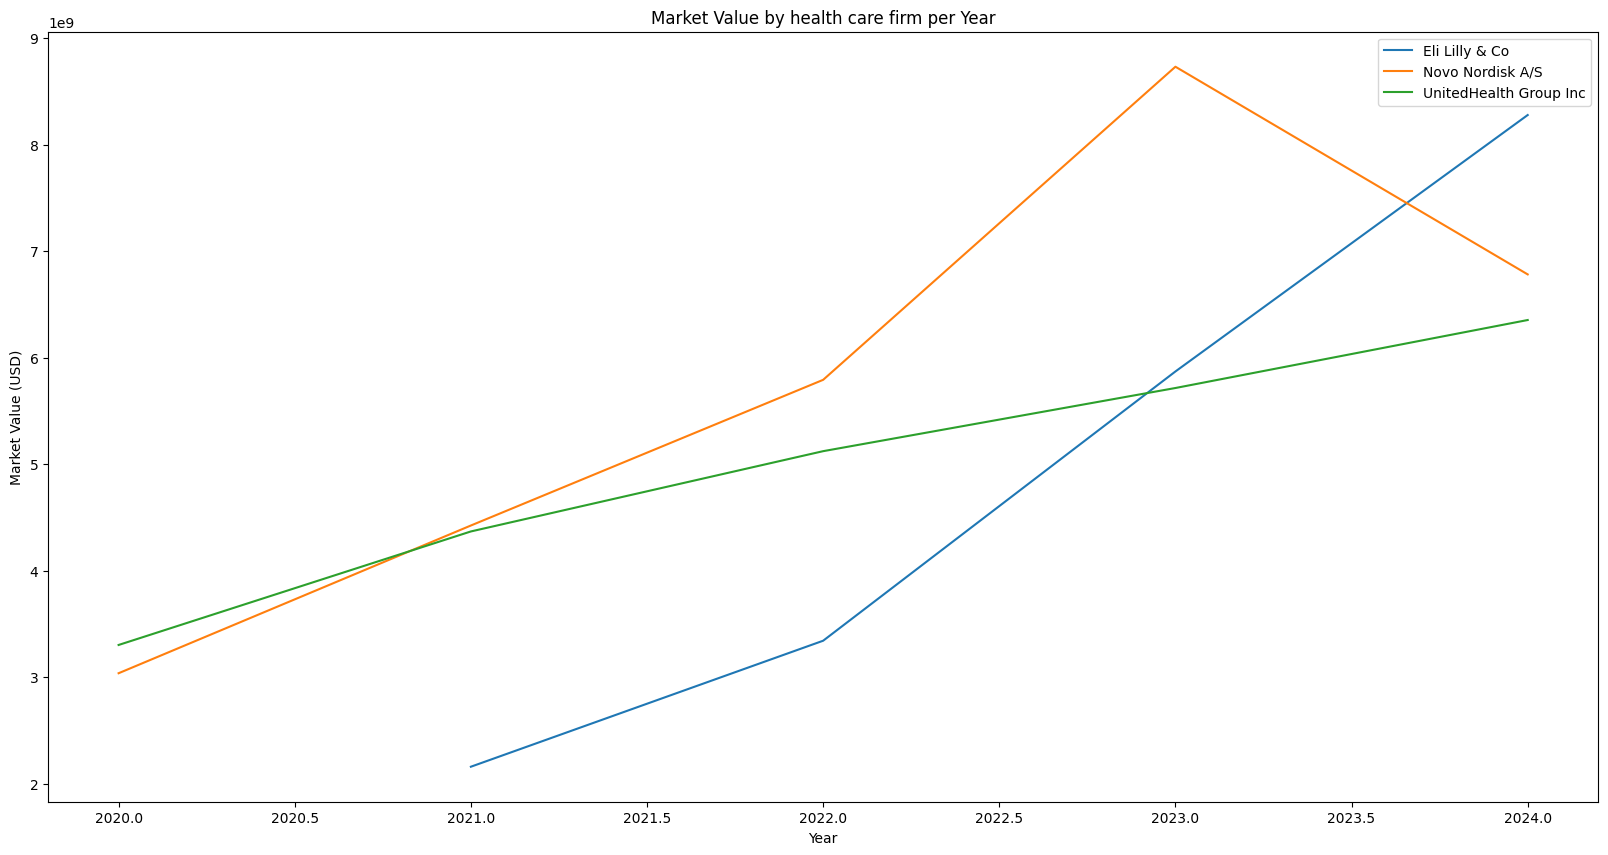

In [119]:
fig, ax = plt.subplots(figsize=(20,10))

for label, df_healthCareFirm in df_biggestHealthCareFirms.groupby('Name'):
	df_healthCareFirm.plot(x="Year", y="Market Value(USD)", ax=ax, label=label)
ax.set_title("Market Value by health care firm per Year")
ax.set_xlabel("Year")
ax.set_ylabel("Market Value (USD)")

Ich empfehle UnitedHealth Group Inc. Es scheint sich hierbei um eine etablierte Firma zu handeln (Daten liegen schon vor 2021 vor) und es ist ein stetiger up Trend zu erkennen.  
Novo Nordisk A/S ist auf einem Down Trend, weshalb sie nicht zu empfehlen ist. Eli Lilly & Co wirkt wie ein Startup (keine Daten vor 2021) vorhanden, was oftmals mehr Risiko mit sich bringt.